# Исследование датасета на основе данных о ETH/USD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ETHUSD.csv', sep=',')


## Подготовка датасета

In [2]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...,...
2262,2021-10-16,3865.666504,3962.453125,3805.885986,3830.382080,3830.382080,1.657810e+10
2263,2021-10-17,3829.858887,3914.897949,3660.723389,3847.104492,3847.104492,1.590809e+10
2264,2021-10-18,3847.729980,3888.209229,3686.750488,3748.760254,3748.760254,1.738620e+10
2265,2021-10-19,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2267 non-null   object 
 1   Open       2262 non-null   float64
 2   High       2262 non-null   float64
 3   Low        2262 non-null   float64
 4   Close      2262 non-null   float64
 5   Adj Close  2262 non-null   float64
 6   Volume     2262 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.1+ KB


### Удаление NaN значений

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2262 entries, 0 to 2266
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2262 non-null   datetime64[ns]
 1   Open       2262 non-null   float64       
 2   High       2262 non-null   float64       
 3   Low        2262 non-null   float64       
 4   Close      2262 non-null   float64       
 5   Adj Close  2262 non-null   float64       
 6   Volume     2262 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 141.4 KB


### Преобразование формата даты в datetime

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2262 entries, 0 to 2266
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2262 non-null   datetime64[ns]
 1   Open       2262 non-null   float64       
 2   High       2262 non-null   float64       
 3   Low        2262 non-null   float64       
 4   Close      2262 non-null   float64       
 5   Adj Close  2262 non-null   float64       
 6   Volume     2262 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 141.4 KB


### Преобразование Volume (объема торгов) в значения кратные миллиону

In [12]:
df['Volume_M_dollars'] = df['Volume'] / 10**6
del df['Volume']
df

,Date,Open,High,Low,Close,Adj Close,Volume_M_dollars
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,0.164329
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,0.674188
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,0.532170
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,0.405283
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100
...,...,...,...,...,...,...,...
2261,2021-10-15,3790.154297,3895.466309,3735.363525,3862.634766,3862.634766,20966.841512
2262,2021-10-16,3865.666504,3962.453125,3805.885986,3830.382080,3830.382080,16578.095629
2263,2021-10-17,3829.858887,3914.897949,3660.723389,3847.104492,3847.104492,15908.090346
2264,2021-10-18,3847.729980,3888.209229,3686.750488,3748.760254,3748.760254,17386.204158


## Анализ датасета

### Рассмотрим графики объема торгов и курса ETH/USD с 2015 по 2021 г.

<Axes: xlabel='Date'>

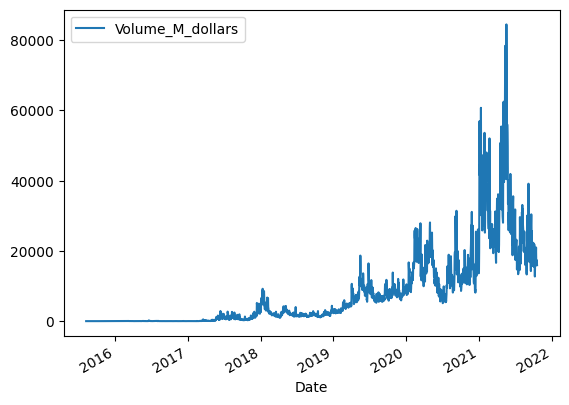

In [17]:
df.plot.line('Date', 'Volume_M_dollars')

<Axes: xlabel='Date'>

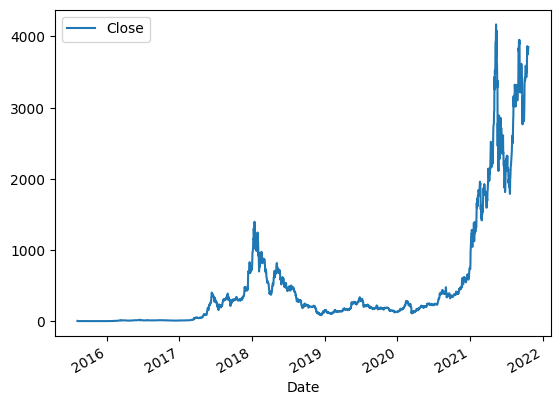

In [18]:
df.plot.line('Date', 'Close')

### Можно заметить два факта
1. Объем торгов имеет тренд на увеличение
2. Курс ETH/USD коррелирует с объемом торгов, но не всегда. В 2019, 2020 годах наблюдается расхождение

### Добавим в датасет дневную волатильность курса (в процентах)

In [20]:
df['Volatility'] = (df['Close'] - df['Open']) / df['Open'] * 100
df

,Date,Open,High,Low,Close,Adj Close,Volume_M_dollars,Volatility
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,0.164329,-2.101271
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,0.674188,-73.035443
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,0.532170,-0.600309
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,0.405283,-0.776062
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100,50.809152
...,...,...,...,...,...,...,...,...
2261,2021-10-15,3790.154297,3895.466309,3735.363525,3862.634766,3862.634766,20966.841512,1.912336
2262,2021-10-16,3865.666504,3962.453125,3805.885986,3830.382080,3830.382080,16578.095629,-0.912764
2263,2021-10-17,3829.858887,3914.897949,3660.723389,3847.104492,3847.104492,15908.090346,0.450293
2264,2021-10-18,3847.729980,3888.209229,3686.750488,3748.760254,3748.760254,17386.204158,-2.572159


### Рассмотрим график волатильности

<Axes: xlabel='Date'>

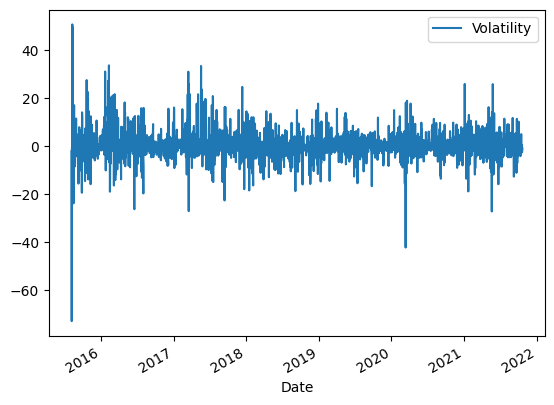

In [21]:
df.plot.line('Date', 'Volatility')

### Как мы видим, дневная волатильность у ETH/USD может достигать 20% и выше


### Проанализируем 2021 год, когда наблюдался повышенный рост курса, значительный рост объема торгов и повышенная волатильность 

In [23]:
df_2021 = df[df['Date'].dt.year == 2021]

<Axes: xlabel='Date'>

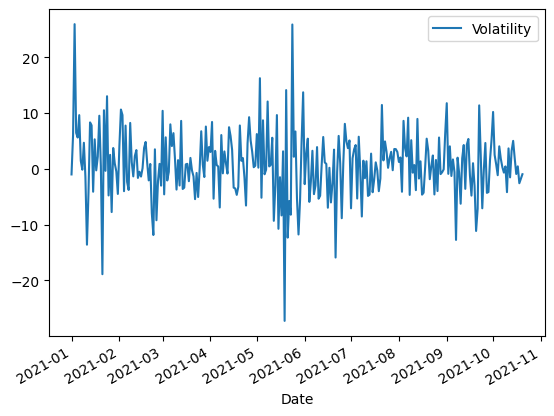

In [24]:
df_2021.plot.line('Date', 'Volatility')

<Axes: xlabel='Date'>

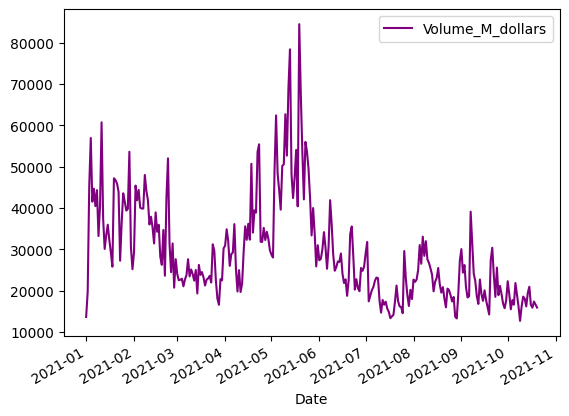

In [25]:
df_2021.plot.line('Date', 'Volume_M_dollars', c='purple')

<Axes: xlabel='Date', ylabel='Close'>

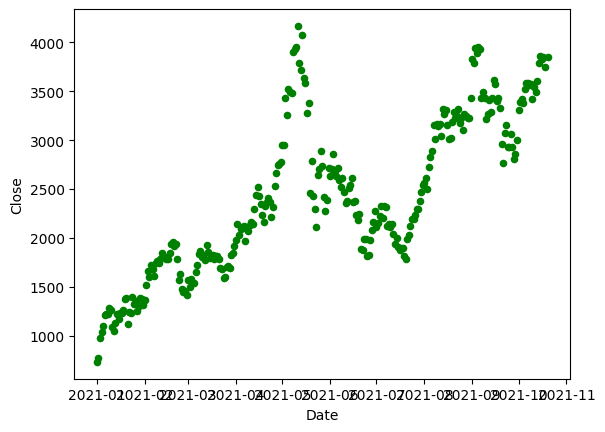

In [26]:
df_2021.plot.scatter('Date', 'Close', c='green')

### Можем заметить следующее
1. С начала года курс стремительно рост, достигая пика в мае 2021
2. Дневной объем торгов в мае достиг 80+ млрд. долларов
3. Волатильность в мае 2021 была повышенной (выше 20% в некоторые дни)

### Также следует отметить

* Начиная с июня 2021 года объемы торгов начали стремительно падать, а курс расти. Наблюдалось расхождение

## Сделаем анализ 2017 года

In [28]:
df_2017 = df[df['Date'].dt.year == 2017]

<Axes: xlabel='Date'>

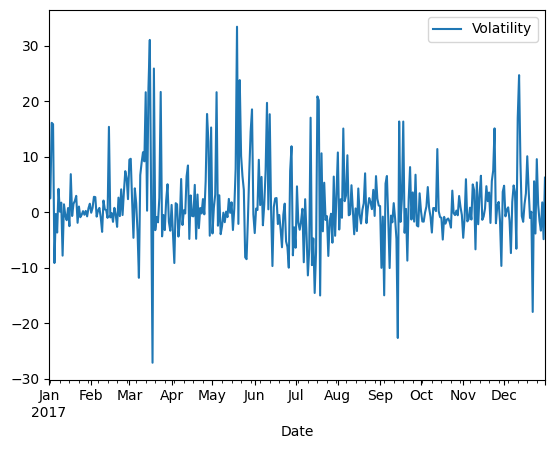

In [29]:
df_2017.plot.line('Date', 'Volatility')

<Axes: xlabel='Date'>

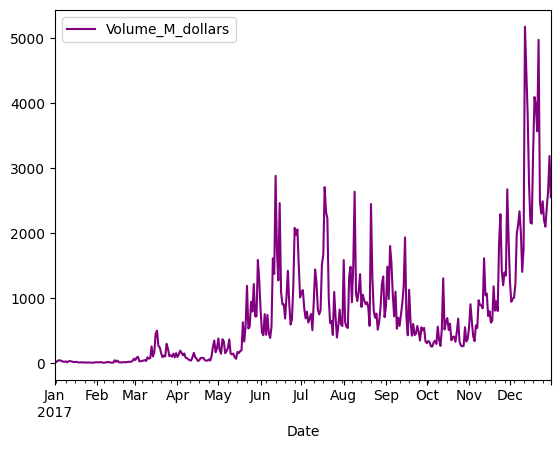

In [30]:
df_2017.plot.line('Date', 'Volume_M_dollars', c='purple')

<Axes: xlabel='Date', ylabel='Close'>

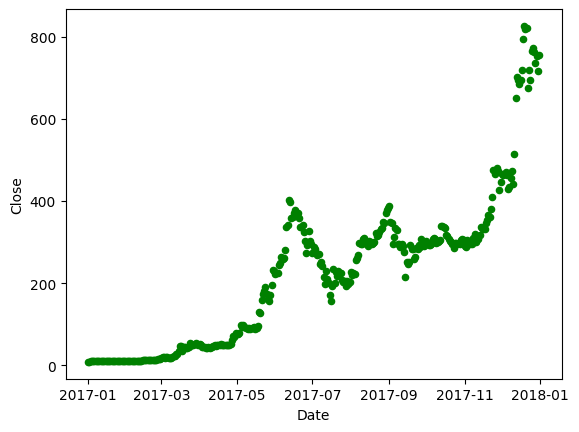

In [31]:
df_2017.plot.scatter('Date', 'Close', c='green')

### Можем заметить следующее

1. Также как и в 2021, в 2017 наблюдается рост курса ETH/USD, но заметна сильная корреляция с объемом торгов
2. Волатильность в 2017 была выше (25-30%) по сравнению с 2021.

## Итоги

### Исходя из анализа датасета можно сделать вывод

* В 2017 и 2021 г. наблюдались значительные движения курса ETH/USD
* Волатильность в 2021 была ниже чем 2017, что может судить о стабилизации актива
* Объем дневных торгов в 2021 достигал 80 млрд. долларов. Заметен общий тренд на повышение объема торгов. Интерес к активу с каждым годом увеличивался
* Судить локально о зависимости роста актива от объема торгов нельзя, наблюдалось расхождение во второй половине 2021 года. В то время как в 2017 году наблюдалась корреляция